<a href="https://colab.research.google.com/github/thelostwolf93/deep_learning_intro/blob/main/24_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG16

## Initial Checks and Importing Libraries

In [ ]:
# checking the availability of GPU:
import tensorflow as tf
if tf.test.gpu_device_name():
  print(f"Default GPU Device {tf.test.gpu_device_name()}")
else:
  print("Please install the GPU version of TF!")

Default GPU Device /device:GPU:0


In [ ]:
# checking the version of GPU:
!nvidia-smi

Mon Mar  1 08:02:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    24W /  75W |    201MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# checking the version of tensorflow:
tf.__version__

'2.4.1'

In [ ]:
# importing the required libraries:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
import pandas as pd
from glob import glob

## Importing and Manipulating the Built Model

In [ ]:
# re-size all the images to 224*224 because that is the standard size used for VGG
IMAGE_SIZE = [224,224]

In [ ]:
# training and validation set paths:
train_path = "/content/drive/MyDrive/datasets/Cats and Dogs/train"
valid_path  = "/content/drive/MyDrive/datasets/Cats and Dogs/test"

In [ ]:
# Importing the VGG16 library + Adding preprocessing layers in the beginning of VGG16
vgg16 = VGG16(input_shape = IMAGE_SIZE + [3],
              weights     = "imagenet",
              include_top = False)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# we don't want to train the existing weights: 
for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
# to get the total number of categories:
folders = glob("/content/drive/MyDrive/datasets/Cats and Dogs/train/*")
num_output = len(folders)
print(f"The number of categories in the train folder is {num_output}")

The number of categories in the train folder is 2


In [ ]:
# the next layer after VGG16 layer is the flattened layer:
x = Flatten()(vgg16.output)

In [ ]:
# now we create the output later which will have 2 categories and will give us the prediction:
prediction = Dense(num_output, activation = "softmax")(x)

In [ ]:
# create a model object:
model = Model(inputs=vgg16.input, outputs = prediction)

In [ ]:
# viewing the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
  # specifying the cost and optimization method
  model.compile( loss     = "categorical_crossentropy",
                optimizer = "adam",
                metrics   = ["accuracy"])

## Training on the Data

In [ ]:
# using the Image Data Generator, we import the images from the dataset:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data Augmentation:
train_datagen = ImageDataGenerator(rescale         = 1./255,
                                   shear_range     = 0.2,
                                   zoom_range      = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) 

In [ ]:
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/datasets/Cats and Dogs/train",
                                                 target_size = (224,224),
                                                 batch_size  = 32,
                                                 class_mode  = "categorical")

Found 8000 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/datasets/Cats and Dogs/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2000 images belonging to 2 classes.


In [ ]:
# fitting the model:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 20,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
  2/250 [..............................] - ETA: 27:59 - loss: 0.6555 - accuracy: 0.6484  

KeyboardInterrupt: ignored

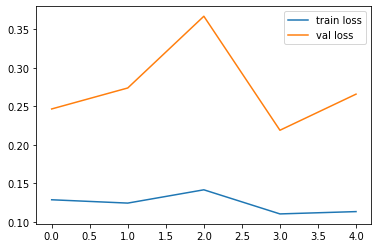

In [ ]:
# Plotting the Loss
import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="train loss")
plt.plot(r.history["val_loss"], label="val loss")
plt.legend()
plt.show()

In [ ]:
# Plotting the accuracy 
plt.plot(r.history["accuracy"], label="training acc")
plt.plot(r.history["val_accuracy"], label="val acc")
plt.legend()
plt.show()